## ADULT_SUPPORT_VECTOR_MACHINE_CLASSIFICATION

###  Import Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

### Check Library Version

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Import Dataset

In [3]:
# Read in train data
adult= pd.read_csv('D:Adult_pre.csv')

In [4]:
adult.shape

(30162, 50)

# Model Building

### 1. Training a Linear Regression Model

In [5]:
y = adult['Income']

In [6]:
X = adult.iloc[:,1:49]

### 2. Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [8]:
X_test.reshape(-1, 1)
y_test.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

### 3. Creating and Training the Model

In [9]:
from sklearn.svm import SVC

model_SVM = SVC()
classifier = model_SVM.fit(X_train,y_train)

#### Prepare to test model to testing data

In [10]:
ypred_test = model_SVM.predict(X_test)

### 4. Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score 

Accuracy: 83.41%


### Confusion Matrix to find accuracy of model

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,plot_confusion_matrix

[[5221  418]
 [ 833 1069]]


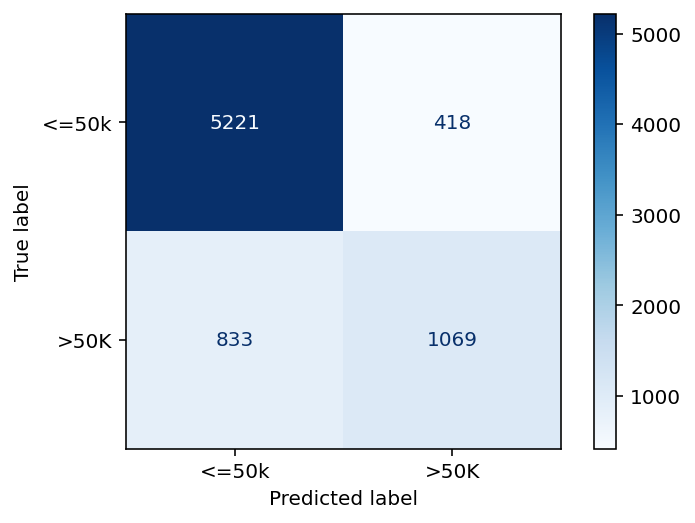

In [13]:
labels = ['<=50k','>50K']
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels = labels,
                             cmap = plt.cm.Blues)
print(disp.confusion_matrix)

### Classification Report

In [18]:
acc = format(accuracy_score(y_test,ypred_test),"0.2%")
print("Accuracy:", acc)
print('\n')
print(classification_report(y_test,ypred_test))

Accuracy: 83.41%


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5639
           1       0.72      0.56      0.63      1902

    accuracy                           0.83      7541
   macro avg       0.79      0.74      0.76      7541
weighted avg       0.83      0.83      0.83      7541



# Predictions from our Model

Actual Income 0.0
Predicted Income 0.0


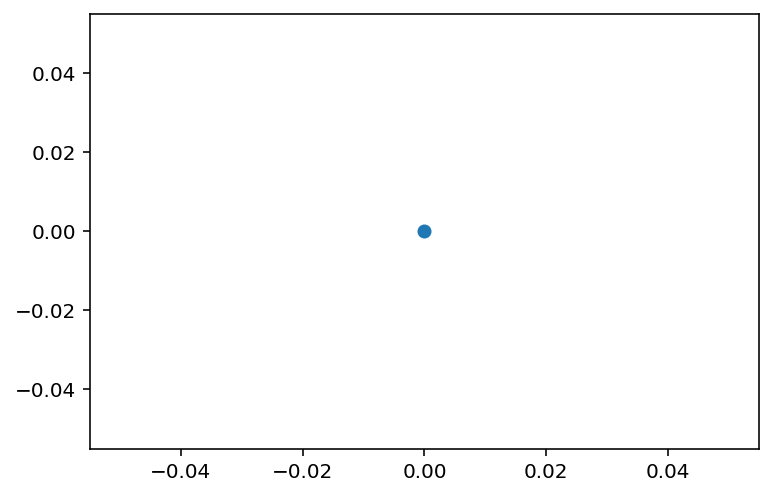

In [15]:
# input : X_test_poly[[random sample for prediction test]]  
ypred_test1 = classifier.predict(X_test[[4952]])

plt.scatter(y_test[[4952]], ypred_test1)
print( "Actual Income",float(y_test[[4952]]))
print( "Predicted Income", float(ypred_test1))

In [16]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': ypred_test})
mlr_diff.head(21)

,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,1,0
9,1,0
